In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Generating Dataset

In [9]:
np.random.seed(10)
x = np.array([i*np.pi/180 for i in range(60,300,4)])
y = np.sin(x) + np.random.normal(0,0.15,len(x))
df = pd.DataFrame(x,columns=['X_1'])
for i in range(2,8):
  col = 'X_' + str(i)
  df[col] = df['X_1']**i
df['Y'] = y
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X_1     60 non-null     float64
 1   X_2     60 non-null     float64
 2   X_3     60 non-null     float64
 3   X_4     60 non-null     float64
 4   X_5     60 non-null     float64
 5   X_6     60 non-null     float64
 6   X_7     60 non-null     float64
 7   Y       60 non-null     float64
dtypes: float64(8)
memory usage: 3.9 KB


Making correlation matrix

<Axes: >

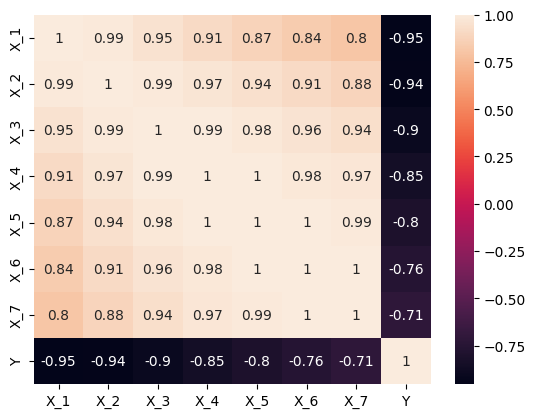

In [10]:
import seaborn as sns
sns.heatmap(df.iloc[:,0:8].corr(),annot=True)

In [11]:
x = df.drop(['Y'],axis = 1).values
y = df['Y'].values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x = np.insert(x,0,values = 1,axis = 1)

from sklearn.model_selection import train_test_split
reg = [1e-15,1e-10,1e-5,1e-3,0,1,10,20]
learning_rate = [0.0001,0.001,0.01,0.1,1,10]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

def GDO_ridge(x_train,y_train,p,iter,alpha,lamba):
  n = len(x_train)
  beta = np.zeros(p)
  for j in range(iter):
    cost_gradient = np.zeros(p)
    for i in range(p):
      cost_gradient[i] = np.sum((x_train.dot(beta)-y_train).dot(x_train[:,i]))
    for i in range(p):
      beta[i] = beta[i]*(1-alpha*lamba/n) - alpha*cost_gradient[i]/n
  return beta

from sklearn.metrics import r2_score
scores = []
for i in learning_rate:
  for j in reg:
    beta = GDO_ridge(x_train,y_train,8,1000,i,j)
    if not np.isnan(beta).any():
      ypred = x_test.dot(beta)
      scores.append([r2_score(y_test,ypred),i,j])
scores.sort(reverse=True)
scores[0]

/tmp/ipykernel_17995/2404874688.py:21: RuntimeWarning: overflow encountered in scalar multiply
  beta[i] = beta[i]*(1-alpha*lamba/n) - alpha*cost_gradient[i]/n


[0.9397019320668524, 0.1, 1]